# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [21]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [22]:
df.ENTRIES = df.ENTRIES.astype(float)

In [79]:
df.EXITS = df.EXITS.astype(float)

In [77]:
df = df.rename(columns=lambda x: x.strip())

In [91]:
df = df.set_index('LINENAME', inplace=True)

In [105]:
df.tail(5)

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197620,r,tram2,r469,00-05-01,rit-roosevelt,rit,08/31/2018,05:00:00,regular,5554.0,348.0
197621,r,tram2,r469,00-05-01,rit-roosevelt,rit,08/31/2018,09:00:00,regular,5554.0,348.0
197622,r,tram2,r469,00-05-01,rit-roosevelt,rit,08/31/2018,13:00:00,regular,5554.0,348.0
197623,r,tram2,r469,00-05-01,rit-roosevelt,rit,08/31/2018,17:00:00,regular,5554.0,348.0
197624,r,tram2,r469,00-05-01,rit-roosevelt,rit,08/31/2018,21:00:00,regular,5554.0,348.0


# Change the Index to be the Line Names

In [ ]:
df = df.set_index('LINENAME', inplace=True)

# Painstakingly change the index back

In [99]:
df = df.reset_index()

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [ ]:
df.groupby('station')

In [116]:
df['Num_Lines']= df.LINENAME.map(lambda x: len(x))

In [117]:
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,00:00:00,regular,6736067.0,2283184.0,7
1,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,04:00:00,regular,6736087.0,2283188.0,7
2,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,08:00:00,regular,6736105.0,2283229.0,7
3,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,12:00:00,regular,6736180.0,2283314.0,7
4,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,16:00:00,regular,6736349.0,2283384.0,7


In [118]:
df.head(1)


,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines
0,nqr456w,a002,r051,02-00-00,59 st,bmt,08/25/2018,00:00:00,regular,6736067.0,2283184.0,7


## Write a function to clean a column name.

In [123]:
def clean(col_name):
    cleaned = col_name.strip('')
    return cleaned

In [125]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [126]:
#Checking the output, we can see the results.
df.columns

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [138]:
df.DATE = pd.to_datetime(df.DATE)

In [189]:
df['day_of_the_week'] = df.DATE.dt.dayofweek

In [190]:
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines,day_of_the_week
0,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,00:00:00,regular,6736067.0,2283184.0,7,5
1,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,04:00:00,regular,6736087.0,2283188.0,7,5
2,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,08:00:00,regular,6736105.0,2283229.0,7,5
3,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,12:00:00,regular,6736180.0,2283314.0,7,5
4,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,16:00:00,regular,6736349.0,2283384.0,7,5


In [193]:
grouped = df.groupby('day_of_the_week').sum()

In [194]:
df.groupby('day_of_the_week').sum()

,ENTRIES,EXITS,Num_Lines
day_of_the_week,,,
0,1.114237e+12,9.119382e+11,76110
1,1.143313e+12,9.422307e+11,77303
2,1.123655e+12,9.206309e+11,75713
3,1.122724e+12,9.206919e+11,76607
4,1.110225e+12,9.067991e+11,75573
5,1.115662e+12,9.091421e+11,74725
6,1.192306e+12,9.592238e+11,75306


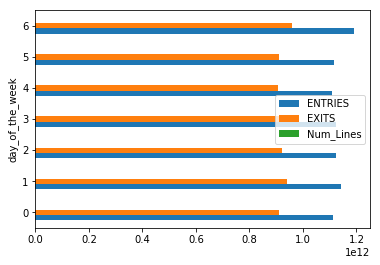

In [195]:
grouped.plot(kind='barh')

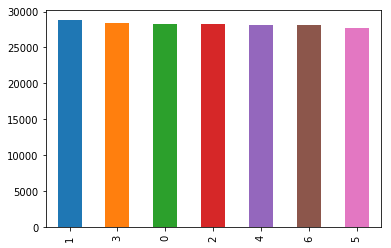

In [196]:
df.day_of_the_week.value_counts().plot(kind = 'bar', )

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [197]:
grouped = grouped.reset_index()

In [198]:
grouped['IsWeekend'] = grouped.day_of_the_week.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
grouped

,day_of_the_week,ENTRIES,EXITS,Num_Lines,IsWeekend
0,0,1.114237e+12,9.119382e+11,76110,False
1,1,1.143313e+12,9.422307e+11,77303,False
2,2,1.123655e+12,9.206309e+11,75713,False
3,3,1.122724e+12,9.206919e+11,76607,False
4,4,1.110225e+12,9.067991e+11,75573,False
5,5,1.115662e+12,9.091421e+11,74725,True
6,6,1.192306e+12,9.592238e+11,75306,True


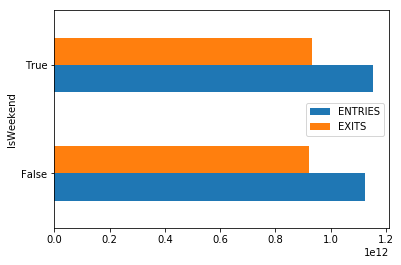

In [199]:
wkend = grouped.groupby('IsWeekend').mean()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')

# Drop a couple of columns

In [200]:
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Num_Lines,day_of_the_week
0,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,00:00:00,regular,6736067.0,2283184.0,7,5
1,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,04:00:00,regular,6736087.0,2283188.0,7,5
2,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,08:00:00,regular,6736105.0,2283229.0,7,5
3,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,12:00:00,regular,6736180.0,2283314.0,7,5
4,nqr456w,a002,r051,02-00-00,59 st,bmt,2018-08-25,16:00:00,regular,6736349.0,2283384.0,7,5


In [203]:
df = df.drop(['C/A', 'SCP'], axis=1)